In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
app_total = 190000
cap_regular = 65000
cap_master = 20000

### 2 functions to calculate chance and # selected under new/old policy

In [3]:
def old_policy(app_master):
#     1st draw for master, always 20K selected
    selected_draw_1 = 20000
    go_to_draw_2 = max(app_master - selected_draw_1, 0)
    remain_total = app_total - selected_draw_1
    selected_draw_2 = go_to_draw_2/remain_total * cap_regular
#     all master selected and chance
    selected_master = selected_draw_1 + selected_draw_2
    chance = min(selected_master / app_master, 1)
    return chance, selected_master    

In [4]:
def new_policy(app_master):
#     1st draw for all
    selected_draw_1 = app_master / app_total * cap_regular
    go_to_draw_2 = app_master - selected_draw_1
#     2nd draw for master, always 20K selected
    selected_draw_2 = min(20000, go_to_draw_2)
#     all master selected and chance
    selected_master = selected_draw_1 + selected_draw_2
    chance = min(selected_master / app_master, 1)
    return chance, selected_master    

### Loop thru possible values to get the result before plotting

In [5]:
# possible range for master_app (75K derived from below chart after trying 190K)
app_range = range(20000, 75000) 

In [6]:
# 3 lists to store increase% and increase # selected, and # selected
chance_increase, selected_increase, selected = [], [], []
# loop thru each possible value for app_master range
for x in app_range:
    old_chance, old_selected = old_policy(x)
    new_chance, new_selected = new_policy(x)
#     append the increase to 2 lists
    chance_increase.append((new_chance/old_chance -1)*100)
    selected_increase.append(new_selected - old_selected)
    selected.append(new_selected)

### Plot the chart

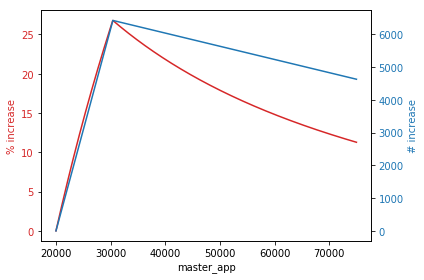

In [7]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('master_app')
ax1.set_ylabel('% increase', color=color)
ax1.plot(app_range, chance_increase, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('# increase', color=color)
ax2.plot(app_range, selected_increase, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.show()

### Find value that leads to 16% increase and 5340 selected increase 

In [8]:
# Just take the range from 50K, meaning starting from index 30K (due to starting point of 20K)
valid_chance_increase = chance_increase[30000:]
valid_selected_increase = selected_increase[30000:]
valid_selected = selected[30000:]

In [9]:
# Find the index where the % increase crosses 16%
i = 0
while valid_chance_increase[i] > 16:
    i+=1

# # of master apps
master_app = 20000 + 30000 + i

In [10]:
print('chance_increase is {}%'.format(round(valid_chance_increase[i], 4)))
print('selected_increase is {}'.format(round(valid_selected_increase[i], 1)))
print('# of master applications is {}'.format(master_app))
print('# of master selected is {}'.format(round(valid_selected[i], 1)))
print('chance for master applicant is {}%'.format(round(valid_selected[i] / master_app * 100, 2)))

chance_increase is 15.9999%
selected_increase is 5396.8
# of master applications is 55910
# of master selected is 39127.1
chance for master applicant is 69.98%
